## 6 Randomized Quick Sort

Este algoritmo ordena un arreglo de tamaño n. Realizan una partición aleatoria y luego pasa a un lado los elementos mayores al pivote y del otro los elementos menores al pivote. Así recursivamente repite el proceso con los 2 subarreglos que se generaron después de la partición.

### 6.1 Algoritmo

In [10]:
from random import randint

def partition (A, p, r):
    x=A[r]
    i=p-1
    for j in range (p, r):
        if A[j]<=x:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]
    return i+1

def randomized_partition (A, p, r):
    i = randint(p,r)
    A[i], A[r] = A[r], A[i]
    return partition(A,p,r)

def randomized_quick_sort (A, p, r):
    if p < r:
        q = randomized_partition(A, p, r)
        randomized_quick_sort(A, p, q-1)
        randomized_quick_sort(A, q+1, r)
    return A

### 6.2 Verificación

In [14]:
A = [15,64,23,8,39,70,48,56, 43, 21, 4]

A = randomized_quick_sort(A, 0, len(A)-1)
print(A)

[4, 8, 15, 21, 23, 39, 43, 48, 56, 64, 70]


**Loop invariante:** En la i-ésima iteración todos los elementos menores que el pivote están antes de éste y los elementos mayores están después y el pivote queda acomodado en su lugar.  
**Inicilización:** En la primera iteración se supone que hubo una partición antes que dejó un arreglo de n elementos y otro de 0 elementos con un pivote con valor infinito. Lo que cumple con el loop invaiante.   
**Mantenimiento:** Como con cada vez que se entra en la recursión se cumple el loop invariante y al realizar el proceso de partición se elige un pivote y se acomodan de un lado los elementos menores y del otro los mayores, se sigue cumpliendo la invariante para entrar en la siguiente recursión.  
**Finalización:** Finalmente cuando el arreglo a ordenar es de un solo elemento, el pivote es éste y está en su lugar. Como todos los elementos del arreglo en algún momento son el pivote, el algoritmo es correcto.

### 6.3 Análisis del tiempo de ejecución

Analizando el tiempo de ejecución por cada línea: La línea 1 se ejecuta $\theta(1)$ veces. La línea 2 tiene tiempo de ejecución $\theta(n)$ ya que ese es el tiempo de ejecución de la función PARTITION. Las líneas 3 y 4 tienen en promedio tiempo de ejecución $T(n/2)$ ya que el pivote es aleatorio. Al sumar todas las líneas tenemos que  
$T(n) = T(n/2)+\theta(n)+\theta(1)$  
Luego al resolver la recursión con el método maestro, llegamos a que  
$T(n) = \theta(nlog(n))$

### 6.4 Experimentación en el tiempo de ejecución

Vamos a realizar 16 ejecuciones del algoritmo para entradas A de tamaño 1000*i con entradas aleatorias con $i\in\{1,\dots,16\}$. Luego tomaremos el timempo que tarda el algoritmo con cada arreglo.

In [21]:
from random import randint
from timeit import default_timer

A=[]
for i in range (16):
    for j in range(1000):
        A.append(randint(0,200))
    inicio = default_timer()
    A = randomized_quick_sort(A, 0, len(A)-1)
    fin = default_timer()
    print(str(len(A)) + ' elementos: ' + str(fin-inicio))

1000 elementos: 0.002095999996527098
2000 elementos: 0.0062827999936416745
3000 elementos: 0.008883500006049871
4000 elementos: 0.0138810999924317
5000 elementos: 0.02109349999227561
6000 elementos: 0.023903599998448044
7000 elementos: 0.02999130000534933
8000 elementos: 0.037802300008479506
9000 elementos: 0.046367400005692616
10000 elementos: 0.05680380000558216
11000 elementos: 0.0616602999944007
12000 elementos: 0.07181880000280216
13000 elementos: 0.0798711999959778
14000 elementos: 0.0877086000109557
15000 elementos: 0.09806709999975283
16000 elementos: 0.1122795999981463


A continuación, graficaremos los puntos $(n,time)$ donde $n$ corresponde al tamaño del arreglo y para fines prácticos, redondearemos los tiempos. 

Text(0, 0.5, 'segundos')

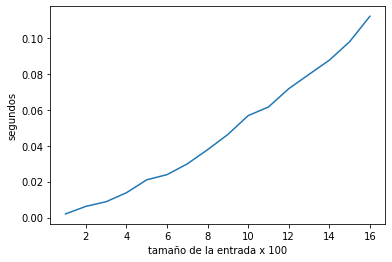

In [23]:
import matplotlib.pyplot as plt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
y=[0.002,0.0062,0.0088,0.0138,0.021,0.0239,0.0299,0.0378,0.0463,0.0568,0.0616,0.0718,0.0798,0.0877,0.098,0.1122]

plt.plot(x, y)
plt.xlabel('tamaño de la entrada x 100')
plt.ylabel('segundos')